In [3]:
import pandas as pd
import numpy as np

In [4]:
#mydata = pd.read_csv("Plot.csv", sep=";",quotechar='"')

In [5]:
mydata = pd.read_csv("Plot.csv")

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                     --------------  ----- 
 0    ID;"Parent ID";"Object state";Status;"Agent name";"Agent first name";Title;Subtitle;Lon;Lat;Accuracy;Date;"Plot number";Status;"Declared area";"Farm gate picture";"Plot delimitation";"Plot centroid";"Soil type";"Soil color";"Soil picture";"Soil quality";Topography  1059 non-null   object
dtypes: o

In [7]:
datacopy = pd.read_csv("Plot.csv", sep=";",quotechar='"')

In [8]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    ID                1059 non-null   int64  
 1   Parent ID          1031 non-null   float64
 2   Object state       1059 non-null   object 
 3   Status             1059 non-null   object 
 4   Agent name         1059 non-null   object 
 5   Agent first name   1059 non-null   object 
 6   Title              0 non-null      float64
 7   Subtitle           0 non-null      float64
 8   Lon                1059 non-null   float64
 9   Lat                1059 non-null   float64
 10  Accuracy           1059 non-null   int64  
 11  Date               1059 non-null   object 
 12  Plot number        1054 non-null   float64
 13  Status.1           1056 non-null   object 
 14  Declared area      1059 non-null   float64
 15  Farm gate picture  1059 non-null   object 
 16  Plot delimitation  1059 

In [9]:
datacopy.columns

Index([' ID', 'Parent ID', 'Object state', 'Status', 'Agent name',
       'Agent first name', 'Title', 'Subtitle', 'Lon', 'Lat', 'Accuracy',
       'Date', 'Plot number', 'Status.1', 'Declared area', 'Farm gate picture',
       'Plot delimitation', 'Plot centroid', 'Soil type', 'Soil color',
       'Soil picture', 'Soil quality', 'Topography'],
      dtype='object')

## Supprimer les vides

In [10]:
liste_a_fouter = ["Title","Subtitle"]

In [11]:
datacopy.drop(liste_a_fouter, axis= 1,inplace = True)

In [12]:
datacopy.columns

Index([' ID', 'Parent ID', 'Object state', 'Status', 'Agent name',
       'Agent first name', 'Lon', 'Lat', 'Accuracy', 'Date', 'Plot number',
       'Status.1', 'Declared area', 'Farm gate picture', 'Plot delimitation',
       'Plot centroid', 'Soil type', 'Soil color', 'Soil picture',
       'Soil quality', 'Topography'],
      dtype='object')

## Verification des doublons

In [13]:
doublons_n = datacopy.duplicated().sum()

In [14]:
doublons_n

0

## Les espaces

In [15]:
datacopy.columns = datacopy.columns.str.replace(" ","_")

In [16]:
datacopy.columns

Index(['_ID', 'Parent_ID', 'Object_state', 'Status', 'Agent_name',
       'Agent_first_name', 'Lon', 'Lat', 'Accuracy', 'Date', 'Plot_number',
       'Status.1', 'Declared_area', 'Farm_gate_picture', 'Plot_delimitation',
       'Plot_centroid', 'Soil_type', 'Soil_color', 'Soil_picture',
       'Soil_quality', 'Topography'],
      dtype='object')

In [17]:
datacopy.rename(columns = {'_ID':'ID'},inplace = True)

## Les vides

In [18]:
missing = datacopy.isnull().sum()

In [19]:
print(missing)

ID                    0
Parent_ID            28
Object_state          0
Status                0
Agent_name            0
Agent_first_name      0
Lon                   0
Lat                   0
Accuracy              0
Date                  0
Plot_number           5
Status.1              3
Declared_area         0
Farm_gate_picture     0
Plot_delimitation     0
Plot_centroid         0
Soil_type            17
Soil_color           25
Soil_picture          0
Soil_quality         24
Topography           20
dtype: int64


## Completer les Vides

In [20]:
variables_categoriel = datacopy.select_dtypes(include = 'object').columns

In [21]:
for i in variables_categoriel:
    if datacopy[i].isnull().any():
        missection = datacopy[datacopy[i].isnull()].index.tolist()
        datacopy[i].iloc[missection] = datacopy[i].mode()[0]

/tmp/ipykernel_4599/3007383732.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  datacopy[i].iloc[missection] = datacopy[i].mode()[0]
/tmp/ipykernel_4599/3007383732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [22]:
missing = datacopy.isnull().sum()

In [23]:
missing

ID                    0
Parent_ID            28
Object_state          0
Status                0
Agent_name            0
Agent_first_name      0
Lon                   0
Lat                   0
Accuracy              0
Date                  0
Plot_number           5
Status.1              0
Declared_area         0
Farm_gate_picture     0
Plot_delimitation     0
Plot_centroid         0
Soil_type             0
Soil_color            0
Soil_picture          0
Soil_quality          0
Topography            0
dtype: int64

## Supprimer les lignes vides dans Parent_ID et Plot_number

In [24]:
col_mis_value = []
for i in datacopy.columns:
    if any(datacopy[i].isnull()) == True:
        col_mis_value.append(i)
col_mis_value

['Parent_ID', 'Plot_number']

In [25]:
datacopy_clean = datacopy.dropna(subset=['Parent_ID', 'Plot_number'])

In [26]:
print(datacopy_clean.isnull().sum())

ID                   0
Parent_ID            0
Object_state         0
Status               0
Agent_name           0
Agent_first_name     0
Lon                  0
Lat                  0
Accuracy             0
Date                 0
Plot_number          0
Status.1             0
Declared_area        0
Farm_gate_picture    0
Plot_delimitation    0
Plot_centroid        0
Soil_type            0
Soil_color           0
Soil_picture         0
Soil_quality         0
Topography           0
dtype: int64


In [27]:
datacopy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1058
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1026 non-null   int64  
 1   Parent_ID          1026 non-null   float64
 2   Object_state       1026 non-null   object 
 3   Status             1026 non-null   object 
 4   Agent_name         1026 non-null   object 
 5   Agent_first_name   1026 non-null   object 
 6   Lon                1026 non-null   float64
 7   Lat                1026 non-null   float64
 8   Accuracy           1026 non-null   int64  
 9   Date               1026 non-null   object 
 10  Plot_number        1026 non-null   float64
 11  Status.1           1026 non-null   object 
 12  Declared_area      1026 non-null   float64
 13  Farm_gate_picture  1026 non-null   object 
 14  Plot_delimitation  1026 non-null   float64
 15  Plot_centroid      1026 non-null   object 
 16  Soil_type          1026 non-n

# Separation des Variables Quantitative des Variables Quantitative

In [28]:
quantitative_vars = datacopy_clean.select_dtypes(include=['int64', 'float64']).columns
qualitative_vars = datacopy_clean.select_dtypes(include=['object']).columns

print("Variables Quantitatives :", quantitative_vars)
print("Variables Qualitatives :", qualitative_vars)

Variables Quantitatives : Index(['ID', 'Parent_ID', 'Lon', 'Lat', 'Accuracy', 'Plot_number',
       'Declared_area', 'Plot_delimitation'],
      dtype='object')
Variables Qualitatives : Index(['Object_state', 'Status', 'Agent_name', 'Agent_first_name', 'Date',
       'Status.1', 'Farm_gate_picture', 'Plot_centroid', 'Soil_type',
       'Soil_color', 'Soil_picture', 'Soil_quality', 'Topography'],
      dtype='object')


# Résumé statistique des variables quantitatives# Résumé statistique des variables quantitatives

In [29]:
quantitative_summary = datacopy_clean[quantitative_vars].describe()


In [30]:
print("Résumé Statistique des Variables Quantitatives :")
print(quantitative_summary)

Résumé Statistique des Variables Quantitatives :
                ID    Parent_ID          Lon          Lat     Accuracy  \
count  1026.000000  1026.000000  1026.000000  1026.000000  1026.000000   
mean    634.971735   612.369396    -0.499834    10.111402     2.481481   
std     321.452263   309.712211     0.338540     0.643317     1.962116   
min      76.000000    73.000000    -1.104845     9.288223     1.000000   
25%     358.250000   345.250000    -0.782563     9.419173     2.000000   
50%     632.500000   611.500000    -0.436549     9.697351     2.000000   
75%     912.750000   879.750000    -0.220594    10.756923     2.000000   
max    1194.000000  1155.000000    -0.102543    10.875983    11.000000   

       Plot_number  Declared_area  Plot_delimitation  
count  1026.000000    1026.000000        1026.000000  
mean      1.150097       1.415595        5490.574302  
std       0.440493       0.891138        4158.275304  
min       1.000000       0.000000         152.000000  
25%      

# Résumé statistique des effectifs et des proportions pour les variables qualitatives

In [31]:
for col in qualitative_vars:
    print(f"\n--- Variable Qualitative : {col} ---")
    
    effectifs = datacopy_clean[col].value_counts()
    print("Effectifs :")
    print(effectifs)
    
    proportions = datacopy_clean[col].value_counts(normalize=True) * 100
    print("\nProportions (%) :")
    print(proportions)


--- Variable Qualitative : Object_state ---
Effectifs :
Object_state
Validated    1026
Name: count, dtype: int64

Proportions (%) :
Object_state
Validated    100.0
Name: proportion, dtype: float64

--- Variable Qualitative : Status ---
Effectifs :
Status
Enable    1026
Name: count, dtype: int64

Proportions (%) :
Status
Enable    100.0
Name: proportion, dtype: float64

--- Variable Qualitative : Agent_name ---
Effectifs :
Agent_name
Abukari        157
Ziblim         147
Azure          135
ATIBUGRI       115
Hamza          105
Abdul-Razak    100
Yahaya          99
Mohammed        96
Braimah         72
Name: count, dtype: int64

Proportions (%) :
Agent_name
Abukari        15.302144
Ziblim         14.327485
Azure          13.157895
ATIBUGRI       11.208577
Hamza          10.233918
Abdul-Razak     9.746589
Yahaya          9.649123
Mohammed        9.356725
Braimah         7.017544
Name: proportion, dtype: float64

--- Variable Qualitative : Agent_first_name ---
Effectifs :
Agent_first_name

# Verification des valeurs abberantes

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
quantitative_vars = ['ID', 'Parent_ID', 'Lon', 'Lat', 'Accuracy', 'Plot_number', 'Declared_area', 'Plot_delimitation']

In [34]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [35]:
def check_outliers(df):
    return df.boxplot(figsize=(15,5))

<Axes: >

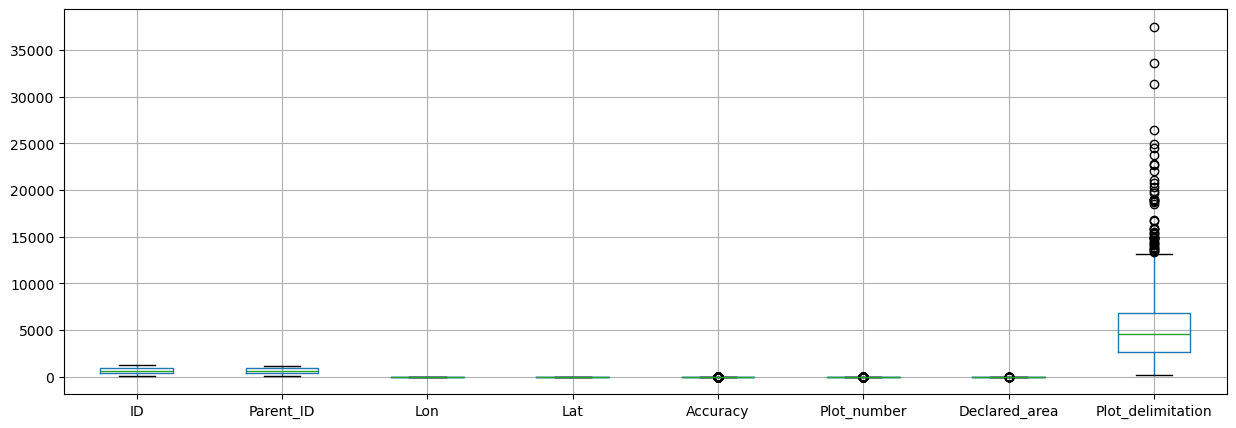

In [36]:
check_outliers(datacopy_clean)

## Tableau de Croisement de Soil_type et Soil_quality

In [39]:
table_cross = datacopy_clean[["Soil_type","Soil_quality"]]

In [41]:
table_cross.head(10)

,Soil_type,Soil_quality
0,Sandy Loam,Average
1,Sandy Loam,Average
2,Sandy Loam,Average
3,Sandy Loam,Average
4,Loamy,Good
5,Sandy,Average
6,Sandy Loam,Average
7,Sandy Loam,Average
8,Loamy,Good
9,Sandy,Good
